# Poles
The so-called *poles* are the poles of the reciprocal of the
z-transform of the sequence made of the samples at the integers of the
polynomial B-spline $\beta^{n}$ of nonnegative degree $n$. More
precisely, they are numbers $z\in{\mathbb{C}}\setminus\{0\}$ such that

$$\frac{1}{\sum_{k\in{\mathbb{Z}}}\,\beta^{n}(k)\,z^{-k}}\not\in{\mathbb{C}}.$$
It so happens that the poles are real and negative; they exist for
$n\in{\mathbb{N}}+2$. Because B-splines are even-symmetric functions,
they come in reciprocal pairs, the poles of interest being those that
lie in the interval $(-1,0).$ In this interval,
$\left\lfloor n/2\right\rfloor$ of them can be found. They play an
important role in spline interpolation, specifically in the process
that converts data samples into spline coefficients.

Poles of successive degrees are imbricated. We illustrate here this
property for a few degrees and plot in emerald color the poles of
even degree and in orange color the poles of odd degree. The degrees
increase from bottom to top of the plot.

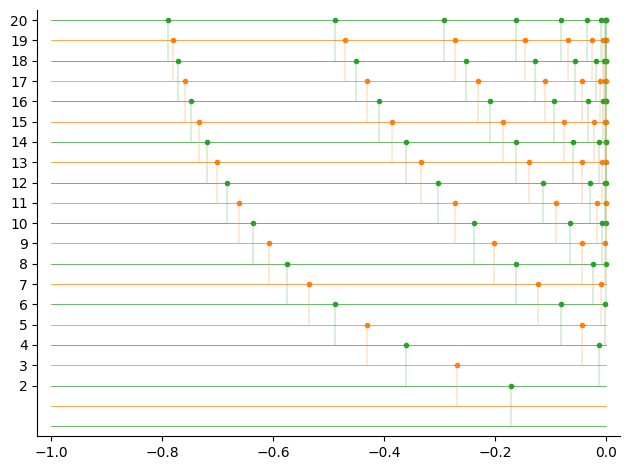

In [1]:
# Load the required libraries.
import matplotlib.pyplot as plt

import splinekit as sk # This library

# Setup
highest_degree = 20

# Layout of the plot
(fig, ax) = plt.subplots()
stems = ax.twinx()
stems.sharey(ax)
stems.axis("off")
plt.xlim(-1.025, 0.025)
plt.ylim(-0.5, highest_degree + 0.5)
plt.yticks(range(2, highest_degree + 1))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Data
plt.plot([-1, 0], [0, 0], "-C2", linewidth = 0.5) # No pole for degree n = 0
plt.plot([-1, 0], [1, 1], "-C1", linewidth = 0.5) # No pole for degree n = 1
for degree in range(2, highest_degree + 1):
    cfmt = str(2 - degree % 2)
    (markerline, stemlines, baseline) = stems.stem(
        sk.pole(degree),
        [degree for _ in sk.pole(degree)],
        linefmt = "-C" + cfmt,
        markerfmt = ".C" + cfmt,
        bottom = degree - 2
    )
    stemlines.set_linewidth(0.25)
    baseline.set_alpha(0.0)
    plt.plot([-1, 0], [degree, degree], "-C" + cfmt, linewidth = 0.5)
fig.tight_layout()
plt.show()

The ``splinekit`` library relies on precomputed poles stored in a cache for all
degrees up to $n=94$. If, for some reason, the cache is emptied, the library then
relies on direct expressions for the determination of poles of degree
$n\in\{2,3,4,5,6,7,8,9\}$. For higher degrees, it relies on ``sympy`` to search
poles in terms of roots of polynomials with rational coefficients. However this
evaluation is extremely costly timewise–on a 2021 desktop computer, the one-minute
threshold is exceeded at even degree $32$ and at odd degree $35$.

In [1]:
import splinekit as sk # This library
sk.spline_utilities._poles = {}

In [2]:
import time

performance = [0, 0]
for degree in range(2, 15):
    print()
    print(degree)
    start = time.perf_counter()
    print(sk.pole(degree))
    end = time.perf_counter()
    print(end - start)
    performance.append(end - start)



2
[-0.17157288]
0.0004003749927505851

3
[-0.26794919]
0.00011612498201429844

4
[-0.36134123 -0.01372543]
0.0001235839445143938

5
[-0.43057535 -0.04309629]
0.00015366694424301386

6
[-0.48829459 -0.08167927 -0.00141415]
0.00012125005014240742

7
[-0.53528043 -0.12255462 -0.00914869]
0.00010212499182671309

8
[-5.74686909e-01 -1.63035269e-01 -2.36322947e-02 -1.53821311e-04]
0.00014074996579438448

9
[-0.60799739 -0.20175052 -0.04322261 -0.00212131]
0.00010791700333356857

10
[-6.36550664e-01 -2.38182798e-01 -6.57270332e-02 -7.52819468e-03
 -1.69827628e-05]
0.059691915987059474

11
[-6.61266069e-01 -2.72180349e-01 -8.97595998e-02 -1.66696274e-02
 -5.10557534e-04]
0.016583750024437904

12
[-6.82864884e-01 -3.03780793e-01 -1.14350520e-01 -2.88361902e-02
 -2.51616622e-03 -1.88330565e-06]
0.02408966701477766

13
[-7.01894252e-01 -3.33107233e-01 -1.38901113e-01 -4.32138667e-02
 -6.73803142e-03 -1.25100113e-04]
0.016006957972422242

14
[-7.18783787e-01 -3.60319072e-01 -1.63033515e-01 -5.908